# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

###tests
import json

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | mambajao
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | mae sot
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | cocoa beach
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | mersa matruh
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | colonia
Processing Record 20 of Set 1 | portland
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | kidal
Pro

Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | am djarass
City not found. Skipping...
Processing Record 45 of Set 4 | kamloops
Processing Record 46 of Set 4 | masterton
Processing Record 47 of Set 4 | catu
Processing Record 48 of Set 4 | berdigestyakh
Processing Record 49 of Set 4 | ebon
Processing Record 0 of Set 5 | porto novo
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | praia
Processing Record 3 of Set 5 | margate
Processing Record 4 of Set 5 | tazovsky
Processing Record 5 of Set 5 | tiksi
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | kapuskasing
Processing Record 8 of Set 5 | gorontalo
Processing Record 9 of Set 5 | phan rang-thap cham
Processing Record 10 of Set 5 | yangquan
Processing Record 11 of Set 5 | jamestown
Processing Record 12 of Set 5 | port-cartier
Processing Record 13 of Set 5 | horqueta
Processing Record 14 of Set 5 | erenhot
Processing Record 15 of Set 5 | petropavlovsk-kamchatsky
Processing R

Processing Record 37 of Set 8 | puerto aysen
Processing Record 38 of Set 8 | siteki
Processing Record 39 of Set 8 | dori
Processing Record 40 of Set 8 | tadine
Processing Record 41 of Set 8 | rongelap
Processing Record 42 of Set 8 | ghat
Processing Record 43 of Set 8 | alotau
City not found. Skipping...
Processing Record 44 of Set 8 | benito garcia (el zorrillo)
City not found. Skipping...
Processing Record 45 of Set 8 | papao
Processing Record 46 of Set 8 | tarawa
Processing Record 47 of Set 8 | leava
Processing Record 48 of Set 8 | la charite-sur-loire
Processing Record 49 of Set 8 | manistee
Processing Record 0 of Set 9 | smithers
Processing Record 1 of Set 9 | ahau
City not found. Skipping...
Processing Record 2 of Set 9 | hovd
Processing Record 3 of Set 9 | lazaro cardenas
Processing Record 4 of Set 9 | pathein
Processing Record 5 of Set 9 | queenstown
Processing Record 6 of Set 9 | simanggang
Processing Record 7 of Set 9 | sola
Processing Record 8 of Set 9 | padam
City not found.

Processing Record 31 of Set 12 | pionerskiy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()



City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,4.71,94,99,1.54,GL,1690395382
1,mambajao,9.2504,124.7156,27.66,80,100,3.84,PH,1690394949
2,iqaluit,63.7506,-68.5145,7.61,81,97,1.79,CA,1690395180
3,papatowai,-46.5619,169.4708,5.42,90,100,12.14,NZ,1690395379
4,blackmans bay,-43.0167,147.3167,9.83,83,100,2.50,AU,1690395415


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,4.71,94,99,1.54,GL,1690395382
1,mambajao,9.2504,124.7156,27.66,80,100,3.84,PH,1690394949
2,iqaluit,63.7506,-68.5145,7.61,81,97,1.79,CA,1690395180
3,papatowai,-46.5619,169.4708,5.42,90,100,12.14,NZ,1690395379
4,blackmans bay,-43.0167,147.3167,9.83,83,100,2.50,AU,1690395415


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

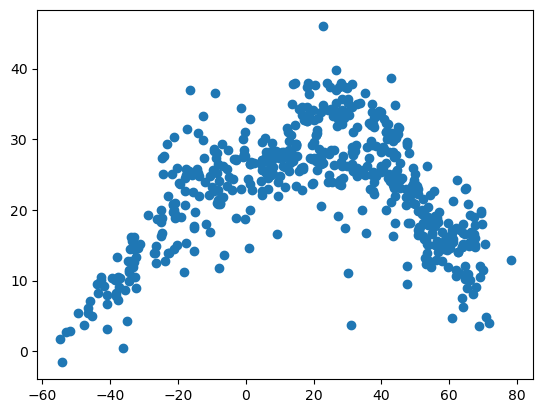

In [13]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(latitude, temp, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

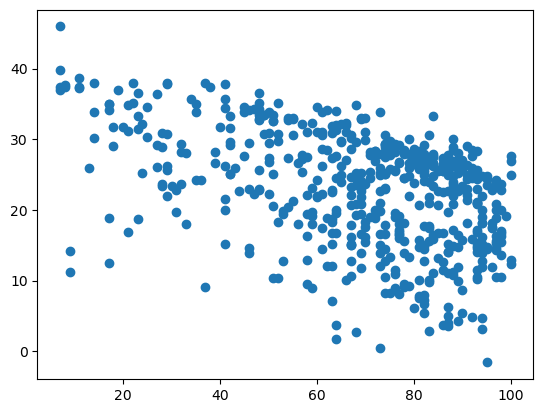

In [14]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(humidity, temp, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

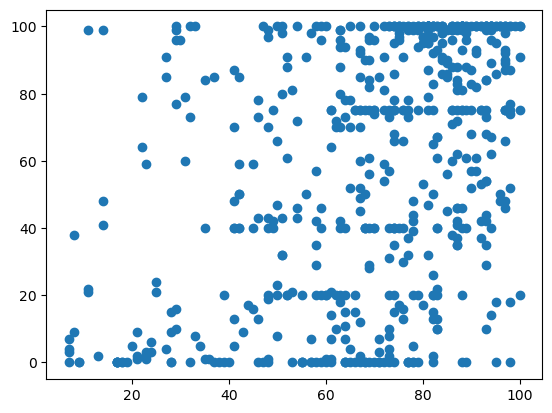

In [15]:
# Build the scatter plots for latitude vs. cloudiness

latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(humidity, cloudiness, marker="o")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

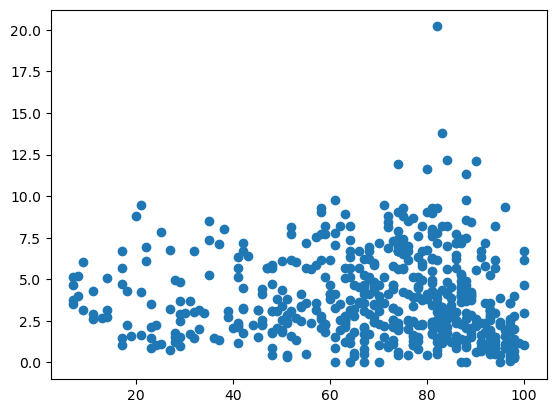

In [16]:
# Build the scatter plots for latitude vs. wind speed

latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(humidity, wind_speed, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE